<a href="https://colab.research.google.com/github/vgruz/epic_data_science_course/blob/main/HW3_Gruzitskaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install vptree

  Preparing metadata (setup.py) ... done
  Created wheel for vptree: filename=vptree-1.3-py3-none-any.whl size=4547 sha256=ae084325d080ea276fe5150bef5ee80e003459bda8ece652ba070c06b33729b5
  Stored in directory: /root/.cache/pip/wheels/3a/eb/ca/904b67530bad0ab02a61978e03549e80bfb1ae07363edb3aab
Successfully built vptree


In [2]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# We will use the Seaborn library
import seaborn as sns
# For an attempt to deal with geo coordinates
from sklearn.cluster import KMeans
import vptree
from geographiclib.geodesic import Geodesic
from scipy.interpolate import interp1d

# Importing Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# Importing Model Selection to split dataset into training and testing set
from sklearn.model_selection import train_test_split
# Check how features affect the target variable
from sklearn.feature_selection import mutual_info_regression
# Importing R² score
from sklearn.metrics import r2_score, mean_squared_error

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

**Steps to cover**


*   Importing a DataFrame
*   Visualize the Data
*   Cleanup and Transform the Data
*   Encode the Data
*   Split Training and Test Sets
*   Fine Tune Algorithms
*   Cross Validate with KFold
*   Upload to Kaggle



Since it is my first attempt to build a prediction using the Linear Models, the plan is following:
1. Follow the steps described in the example notebook from the practice session (finitial feature categorisation and analysis, applying sklearn linear regression)
2. Get the initial accuracy
3. Try to enhance it with the better feature engineering and fine tuning

# Importing both test and train datasets

*   There are no nulls in the data so no need to deal with empty values.
*   All the values are numeric, what is handy for the linear regression.
*   The test and train statistics are very colse -> seems like both datasets were taken from the same distribution

In [76]:
df_train = pd.read_csv("https://raw.githubusercontent.com/vgruz/epic_data_science_course/main/train_hous_prices.csv",index_col=0)
df_test = pd.read_csv("https://raw.githubusercontent.com/vgruz/epic_data_science_course/main/test_house_prices.csv",index_col=0)
pd.set_option('display.max_columns', None)
print("Test data:")
print(df_test.shape)
print(df_test.info())

print("Train data:")
print(df_train.shape)
print(df_train.info())

df_train.head(20)

Test data:
(24759, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24759 entries, 37137 to 61895
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      24759 non-null  float64
 1   HouseAge    24759 non-null  float64
 2   AveRooms    24759 non-null  float64
 3   AveBedrms   24759 non-null  float64
 4   Population  24759 non-null  float64
 5   AveOccup    24759 non-null  float64
 6   Latitude    24759 non-null  float64
 7   Longitude   24759 non-null  float64
dtypes: float64(8)
memory usage: 1.7 MB
None
Train data:
(37137, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 37137 entries, 0 to 37136
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       37137 non-null  float64
 1   HouseAge     37137 non-null  float64
 2   AveRooms     37137 non-null  float64
 3   AveBedrms    37137 non-null  float64
 4   Population   37137 non-

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
id                                                                           
0    2.3859      15.0  3.827160   1.112100      1280.0  2.486989     34.60   
1    3.7188      17.0  6.013373   1.054217      1504.0  3.813084     38.69   
2    4.7750      27.0  6.535604   1.103175      1061.0  2.464602     34.71   
3    2.4138      16.0  3.350203   0.965432      1255.0  2.089286     32.66   
4    3.7500      52.0  4.284404   1.069246      1793.0  1.604790     37.80   
5    6.8075      26.0  6.764372   1.091787      2147.0  2.703540     33.84   
6    2.3654      21.0  4.734884   1.011396      1112.0  2.937247     35.65   
7    2.3562      31.0  5.186567   1.154229      1346.0  3.348259     32.68   
8    2.2672      23.0  4.640155   1.064302       628.0  1.774461     38.53   
9    5.6370      20.0  4.391863   1.053312      1634.0  2.681388     33.88   
10   2.6058      26.0  4.295050   1.024242      1667.0  4.287313     34.04   
11   6.3942      23.0  7.010324   1.000000      1333.0  2.817259     37.89   
12   4.7222      16.0  5.828196   1.067138      1275.0  2.727960     34.17   
13   6.3110      14.0  7.043478   1.027660      1573.0  3.143411     37.21   
14   1.8792      26.0  4.983398   1.110937      1560.0  2.184127     36.80   
15   3.2823      10.0  4.965882   1.052889      1727.0  2.190813     38.03   
16   2.3750      44.0  3.837209   1.069767      1278.0  4.232558     34.07   
17   2.7543      38.0  3.759865   1.038331      1605.0  4.072153     33.97   
18  12.4118      18.0  8.863081   1.112082      1288.0  3.050392     34.04   
19   4.1518      18.0  4.756545   1.067616      3055.0  2.280738     34.15   

    Longitude  MedHouseVal  
id                          
0     -120.12      0.98000  
1     -121.22      0.94600  
2     -120.45      1.57600  
3     -117.09      1.33600  
4     -122.41      4.50000  
5     -118.31      3.71400  
6     -117.64      0.81100  
7     -117.07      0.82400  
8     -121.43      0.99500  
9     -118.36      2.29100  
10    -117.74      1.39300  
11    -122.08      2.09200  
12    -118.38      1.82500  
13    -121.87      2.83600  
14    -119.80      0.77100  
15    -122.06      2.25000  
16    -118.19      1.50700  
17    -118.28      1.62900  
18    -118.90      5.00001  
19    -118.43      3.43300

In [77]:
df_train.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  37137.000000  37137.000000  37137.000000  37137.000000  37137.000000   
mean       3.851029     26.057005      5.163124      1.062204   1660.778919   
std        1.803167     12.158221      1.206242      0.096490   1302.469608   
min        0.499900      2.000000      0.851064      0.500000      3.000000   
25%        2.602300     17.000000      4.357522      1.020305    952.000000   
50%        3.515600     25.000000      5.068611      1.054545   1383.000000   
75%        4.699700     35.000000      5.858597      1.088825   1856.000000   
max       15.000100     52.000000     28.837607      5.873181  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  37137.000000  37137.000000  37137.000000  37137.000000  
mean       2.831243     35.570030   -119.554329      2.079751  
std        2.702413      2.083179      1.974028      1.158571  
min        0.950000     32.550000   -124.350000      0.149990  
25%        2.394495     33.930000   -121.800000      1.208000  
50%        2.744828     34.190000   -118.450000      1.808000  
75%        3.125313     37.700000   -118.020000      2.660000  
max      502.990610     41.950000   -114.550000      5.000010

In [ ]:
df_test.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  24759.000000  24759.000000  24759.000000  24759.000000  24759.000000   
mean       3.832618     26.041561      5.168789      1.063599   1679.327548   
std        1.797503     12.177907      1.252874      0.123630   1365.598976   
min        0.499900      2.000000      1.000000      0.560000      3.000000   
25%        2.590150     17.000000      4.356443      1.020460    955.000000   
50%        3.504600     25.000000      5.077143      1.054094   1398.000000   
75%        4.687500     35.000000      5.858646      1.088295   1874.000000   
max       15.000100     52.000000     56.269231     10.500000  35682.000000   

           AveOccup      Latitude     Longitude  
count  24759.000000  24759.000000  24759.000000  
mean       2.830808     35.598007   -119.570208  
std        1.615320      2.097787      1.977200  
min        0.764706     32.550000   -124.230000  
25%        2.400000     33.930000   -121.800000  
50%        2.751592     34.200000   -118.460000  
75%        3.129167     37.720000   -118.020000  
max      230.172414     41.950000   -114.550000

# Visualizing the data



*   Average occupance has the outliers which skew the results. (max value is 230 against the mean in 2.8) Let's remove them.
*   Population and Average Bedrooms have the big standard deviation. I can not drop all outliers without loosing the information so I'll use 3 sigma rule



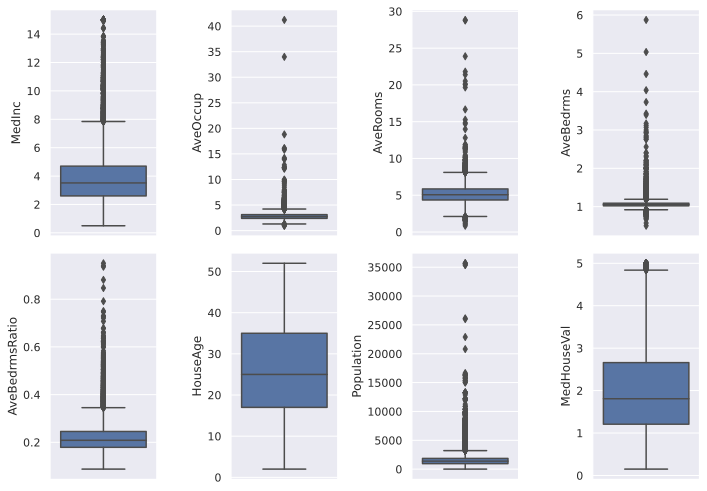

In [78]:
df_train = df_train.drop(18397) # AveOccup outlier
def draw_boxplots(df, cols, ncols=4):
  fig, axes = plt.subplots(nrows=2, ncols=ncols, figsize=(10, 7))
  for idx, feat in enumerate(cols):
      ax = axes[int(idx / ncols), idx % ncols]
      sns.boxplot(y=feat, data=df, ax=ax)
      ax.set_xlabel("")
      ax.set_ylabel(feat)
  fig.tight_layout();

cols = ['MedInc', 'AveOccup', 'AveRooms', 'AveBedrms',  'AveBedrmsRatio', 'HouseAge', 'Population', 'MedHouseVal']
df_train["AveBedrmsRatio"] = df_train["AveBedrms"] / df_train["AveRooms"]
draw_boxplots(df_train, cols)

In [79]:
df_train.sort_values(by = 'AveOccup', ascending = False)

MedInc  HouseAge   AveRooms  AveBedrms  Population   AveOccup  \
id                                                                     
10711  4.4125       4.0   7.285714   2.560458      55.000  41.214286   
4221   2.5195      32.0   3.796597   1.079324    2374.000  33.987712   
3388   3.1250      13.0   5.346591   1.060606    2827.000  18.821818   
17430  0.9220      16.0   2.686275   1.019608    1423.000  16.117647   
28368  2.0960      33.0   5.752830   1.132075    1657.000  16.091954   
...       ...       ...        ...        ...         ...        ...   
22809  2.0074      52.0   3.327698   1.058215    2147.000   1.169435   
6859   3.5488      14.0  11.679878   2.000000      88.000   1.077160   
33717  5.3750      52.0   3.000000   1.000000      28.000   1.075000   
32713  2.6902      34.0   4.680000   1.150000    1174.000   0.955000   
13780  2.5714      35.0   3.075000   0.950000       4.125   0.950000   

       Latitude  Longitude  MedHouseVal  AveBedrmsRatio  
id                                                       
10711     34.07    -117.73      3.42000        0.351435  
4221      34.17    -119.17      1.51900        0.284287  
3388      38.89    -120.85      1.08800        0.198371  
17430     35.35    -119.01      0.55700        0.379562  
28368     35.14    -119.46      0.75000        0.196786  
...         ...        ...          ...             ...  
22809     37.80    -122.42      0.75000        0.318002  
6859      38.02    -119.79      0.99200        0.171235  
33717     37.85    -122.49      4.00000        0.333333  
32713     37.40    -121.89      5.00001        0.245726  
13780     33.79    -118.31      3.50000        0.308943  

[37136 rows x 10 columns]

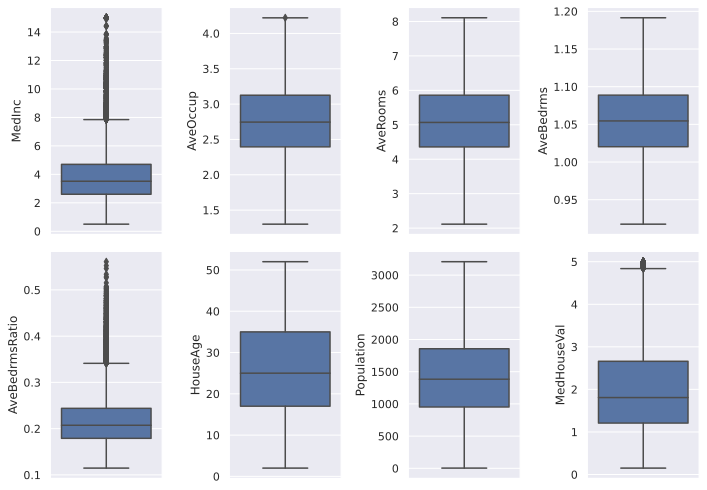

In [80]:
# I can not properly explain the average occupance, population, average rooms outliers, I'll try to replace these values with the closest of the box plox border values
# so that all the values fit in the box plot rectangle (q1 : q3)

feat = ['AveRooms', 'AveBedrms',  'AveOccup', 'Population']
def replace_outliers(df, feature):
    col = df[feature]

    q1, q3 = col.quantile([0.25, 0.75])
    cond_low = (col[col < q1 - 1.5 * (q3 - q1)]).index
    con_high = (col[col > q3 + 1.5 * (q3 - q1)]).index
    return col.replace(col[cond_low].values, q1).replace(col[con_high].values, q3)

for f in feat:
    df_train[f] = replace_outliers(df_train, f)
df_train["AveBedrmsRatio"] = df_train["AveBedrms"] / df_train["AveRooms"]
draw_boxplots(df_train, cols)

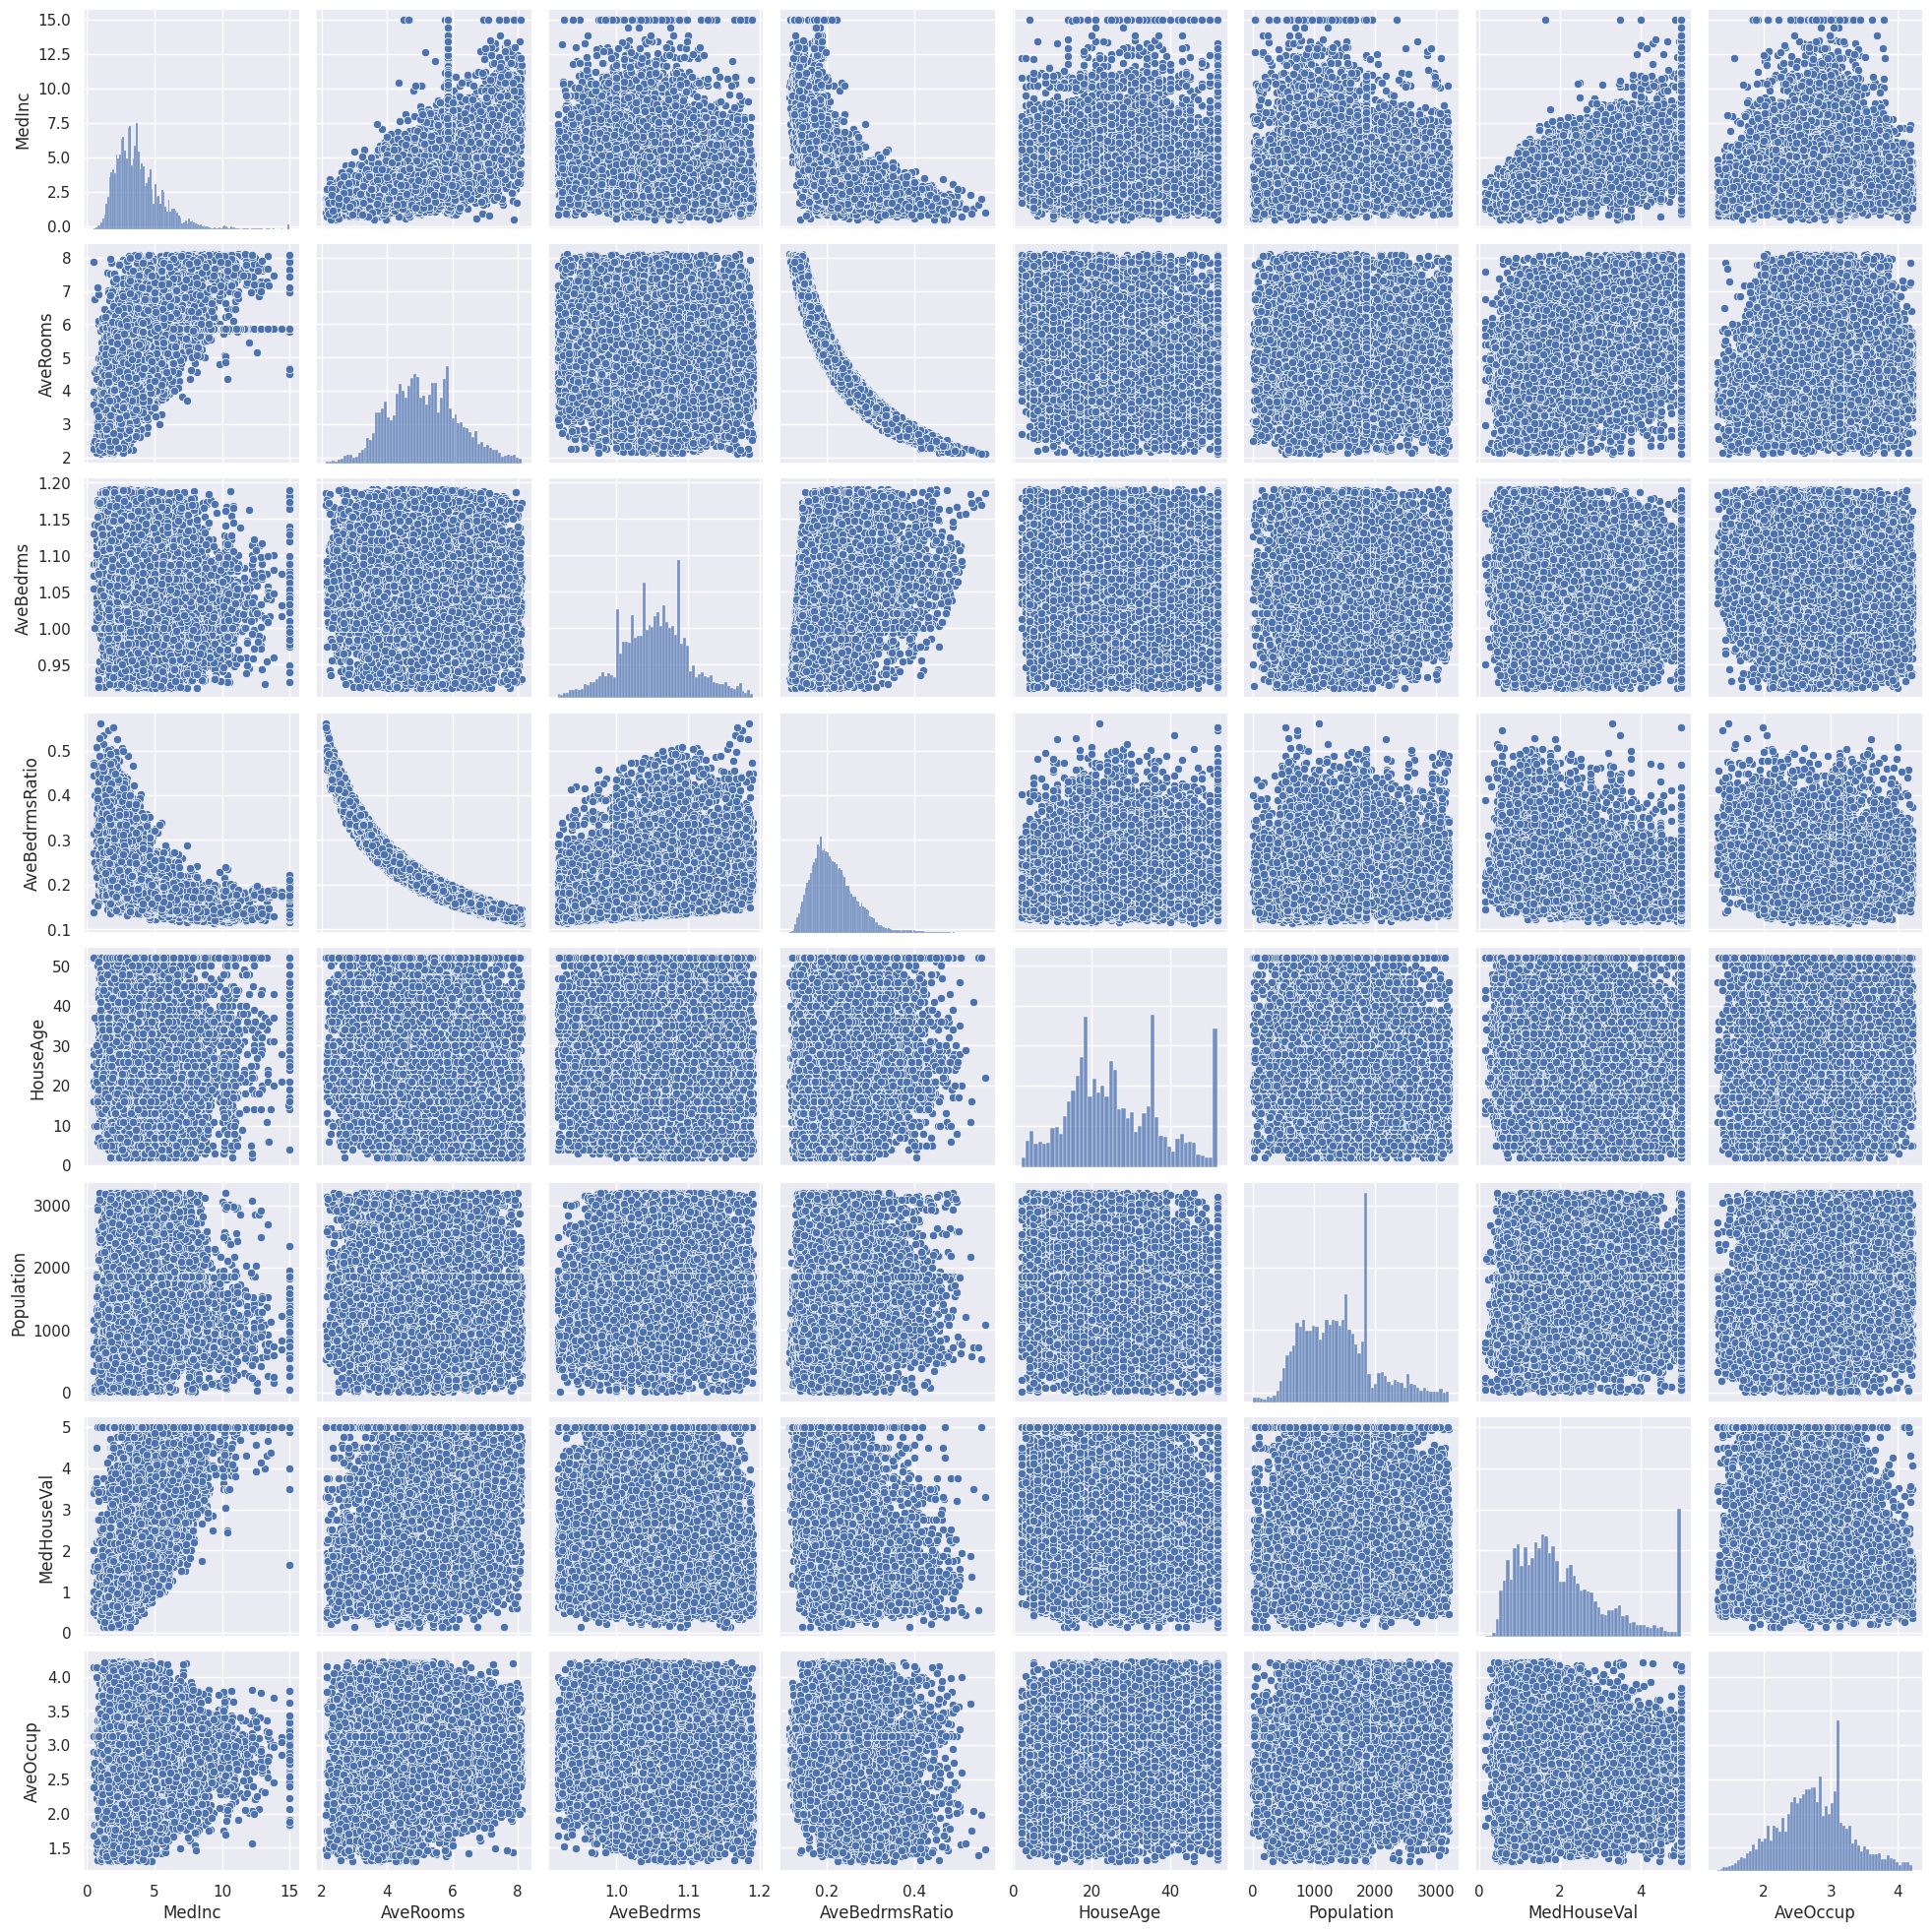

In [48]:
%config InlineBackend.figure_format = 'png'
cols = ['MedInc', 'AveRooms', 'AveBedrms',  'AveBedrmsRatio', 'HouseAge', 'Population', 'MedHouseVal', 'AveOccup']
sns.pairplot(df_train[cols])

`MedHouseVal` - a target variable to predict. Its density plot shows an unusual spike on the 5.0001 (maximum) value.

count    37136.000000
mean         2.079687
std          1.158520
min          0.149990
25%          1.208000
50%          1.808000
75%          2.660000
max          5.000010
Name: MedHouseVal, dtype: float64

<ipython-input-49-726ef80859ae>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['MedHouseVal']);


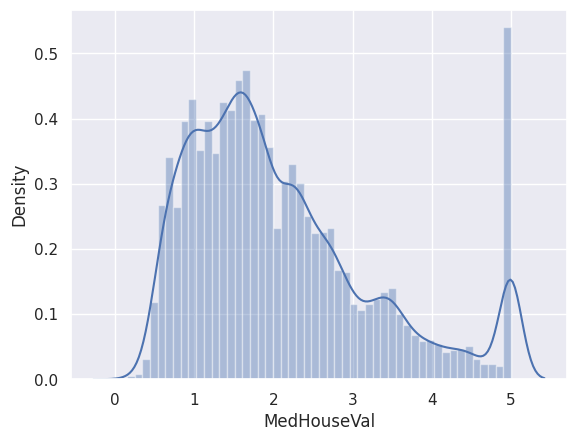

In [49]:
display(df_train['MedHouseVal'].describe())
sns.distplot(df_train['MedHouseVal']);

Maybe we'll find something special in this '5.0001' houses. Let’s create box plots to visualize the distribution statistics of the numerical variables in two groups: Houses with 5.0001 price (MaxPrice=True) and the rest (MaxPrice=False). We see, the 25th Percentile of the `MedInc` for the max price houses is higher then 75th Percentiule of the rest. The mean House Age is also significantly higher. So it seems like the values with '5.0001' value are from different distribution. Let's try to drop them before fitting the model.

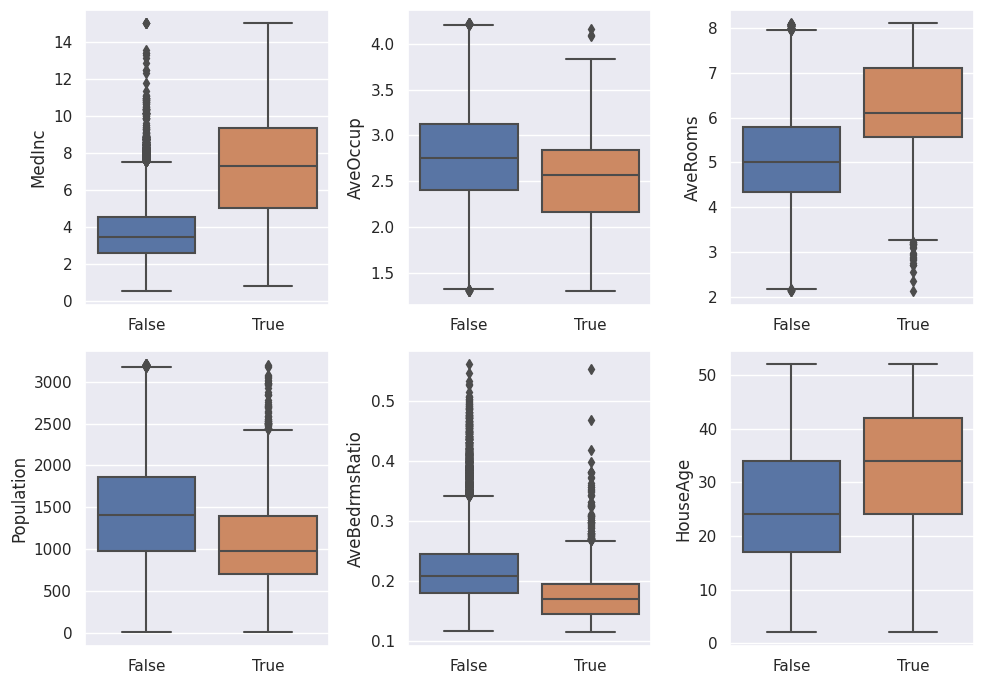

In [50]:
df_train["MaxPrice"] = np.where(df_train['MedHouseVal'] > 5, True, False)
cols = ['MedInc', 'AveOccup', 'AveRooms', 'Population',  'AveBedrmsRatio', 'HouseAge']


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
for idx, feat in enumerate(cols):
    ax = axes[int(idx / 3), idx % 3]
    sns.boxplot(x="MaxPrice", y=feat, data=df_train, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

`Latitude` and `Longtitude`

Seems like the Latitude and Longtitude may be useful for the prediction (more expensinve housing tend to be near the ocean cost), but I see the following challenges:


*   They make sence only as a combination
*   Some complex logic should used for the coordinates analyses (maybe
clustering or k-means)
*   Black color introduced for the 5.0001 value to check if we can explain them, but I did not find anything meaningful in their location.

In [51]:
import plotly.express as px

# Introducing black to check these 5.0001 values
color_scale = [(0, "blue"), (0.5,"pink"), (0.99, "red"), (1, "black")]

fig = px.scatter_mapbox(df_train, lat="Latitude", lon = "Longitude", color = "MedHouseVal", color_continuous_scale=color_scale, size = "MedHouseVal", zoom = 6, height = 800, width = 800)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

So, clustering is not very useful since the most expensive housing is somehow concentrated near the bottom curve of the coordinates distribution. Since it is California, we may assume the houses are located near the coast line.

We checked it on the prior step by ploting the points on the Open Street Map. Indeed, the House price rises if close to the coast line. Also, the black points (the houses with the misterious 5,0001 price seems to be concentrated near the big cities or renown places (San Francisco, especially Palo Alto, Mountain View, Santa Barbara, Santa Monica)). Creating the related feature seems to be much more complex task, so ignoring this for now.

So it should be useful to have some coordinates of the shore line to be able to calculate the distance.
I found [this resource](https://www.findlatitudeandlongitude.com/l/Central+California+Coast/3788810/) and extracted some datapoints ((lon, lat) pairs) to the raw file :
https://raw.githubusercontent.com/vgruz/epic_data_science_course/main/coast_line_coords.csv

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



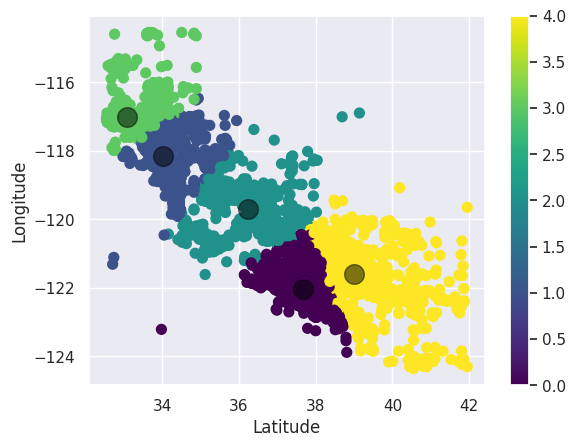

In [52]:
# Kmeans is not so useful, but may be used to categorise the locations
kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(df_train[['Latitude', 'Longitude']]) # Compute k-means clustering.
df_train['cluster_label'] = kmeans.fit_predict(df_train[['Latitude', 'Longitude']])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(df_train[['Latitude', 'Longitude']]) # Labels of each point
df_train.head(10)
df_train.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [53]:
"""
Check that the cost line datapoints are correct
c = get_cost_line()
dataset = pd.DataFrame({'Longitude': c[:, 0], 'Latitude': c[:, 1]})
color_scale = [(0, "blue"), (0.2,"pink"), (0.99, "red"), (1, "black")]
coords_arr = pd.read_csv("https://raw.githubusercontent.com/vgruz/epic_data_science_course/main/coast_line_coords.csv")[['lon', 'lat']]
fig = px.scatter_mapbox(dataset, lat="Latitude", lon = "Longitude", zoom = 8, height = 800, width = 1600)
fig.update_layout(mapbox_style="open-street-map")
fig.show()
"""

def _get_cost_line():
  # File with the coordinates of the California State cost line.
  # It contains quite sparse data points, so some interpolation will be needed to use this file for the distance calculation
  coords_df = pd.read_csv("https://raw.githubusercontent.com/vgruz/epic_data_science_course/main/coast_line_coords.csv")[['lon', 'lat']]
  # To be able to correctly define the distance between house and cost we need more points on the curve.
  # So I use the interpolation (cubic spline) to enlarge the number of points on the coast line.
  N = coords_df.shape[0]
  x = coords_df.iloc[:,1:].values.reshape(1, N)
  y = coords_df.iloc[:,0:1].values.reshape(1, N)
  xy = np.vstack((x, y))
  t = np.linspace(0, 1, N)
  spline = interp1d(t, xy, kind="cubic")

  t_fine = np.linspace(0, 1, 4 * N)
  x_fine, y_fine = spline(t_fine)
  return np.concatenate( [y_fine.reshape(y_fine.shape[0], 1), x_fine.reshape(x_fine.shape[0], 1)], axis = 1)

def _geodist(c1, c2):
  return Geodesic.WGS84.Inverse(c1[1], c1[0], c2[1], c2[0] )['s12']


def _get_dist_from_cost_line(lat, lon, coast):
  c = coast.get_nearest_neighbor([lon, lat])
  return c[0]

def get_distance_from_the_ocean(df, lat='Latitude', lon="Longitude"):
   # vp tree is quite complex strcture and there should be some more simple and effective ways to calculate the distances between the point and the curve defined by the set of points.
   # However, this is not the main subject of the homework, so I will not focus on enhancing this part for now.
    coast = vptree.VPTree(_get_cost_line(), _geodist)

    df['dist_from_cost'] = df.apply(lambda x: _get_dist_from_cost_line(x[lat], x[lon], coast),
                        axis=1)
    return df

df_train = get_distance_from_the_ocean(df_train)

<ipython-input-54-c66805db9806>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



<Axes: xlabel='dist_from_cost', ylabel='MedHouseVal'>

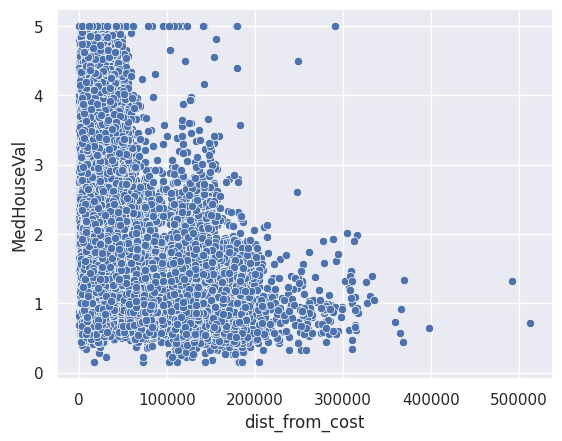

In [54]:
# It is still not a linear dependance, however, something resembling y = 1/x can be noticed
sns.scatterplot(x=df_train["dist_from_cost"], y=df_train["MedHouseVal"],
                data=df_train, palette="vlag")

<Axes: xlabel='Latitude', ylabel='Longitude'>

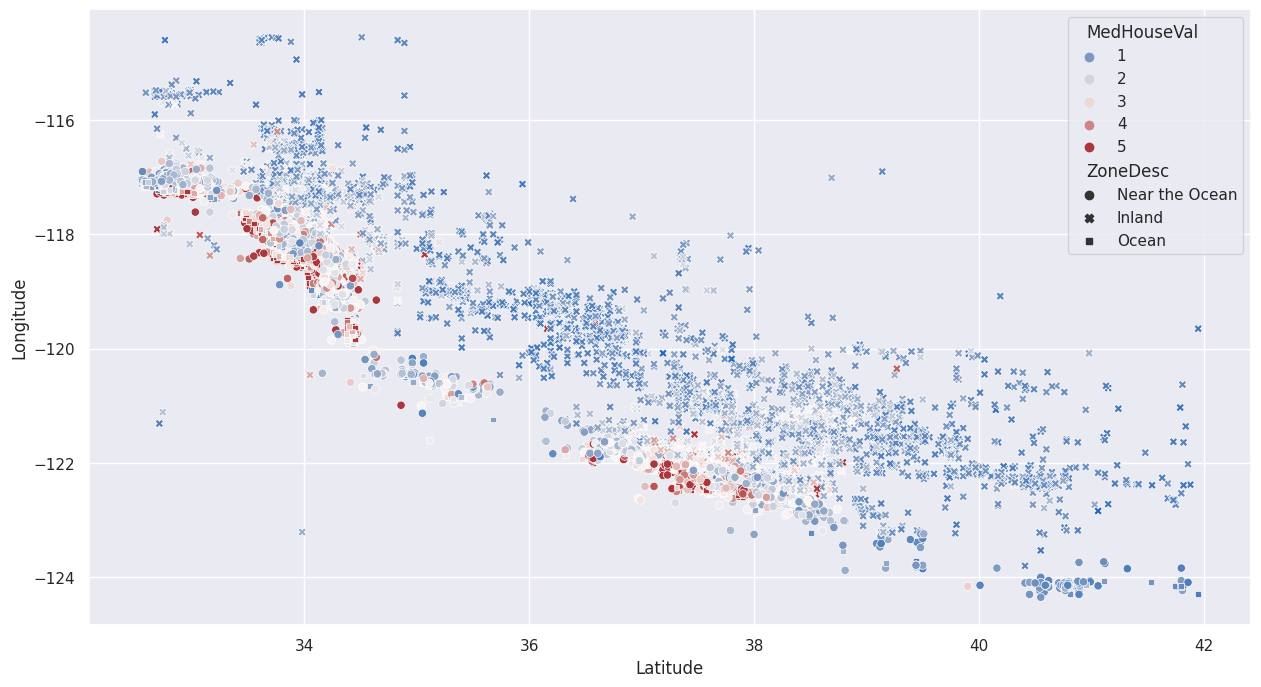

In [55]:
# This is an attempt to categorise the distance, however since we try to predict the continious variable it may make sence to leave the distance feature as it is (continious).
def _get_zone_code(dist):
  if dist < 5000:
    return 0, 'Ocean'
  if dist < 45000:
    return 1, 'Near the Ocean'
  else:
    return 2, 'Inland'

def get_zone_code(df):
  df['ZoneCode'], df['ZoneDesc'] = zip(*df.apply(lambda x: _get_zone_code(x['dist_from_cost']), axis = 1))
  return df

df_train = get_zone_code(df_train)

plt.figure(figsize=(15,8))
sns.scatterplot(x=df_train["Latitude"], y=df_train["Longitude"],
                data=df_train, hue="MedHouseVal", style = 'ZoneDesc', palette="vlag")

In [61]:
# Remove 5.0001 values
df_train = df_train[~df_train['MaxPrice']]

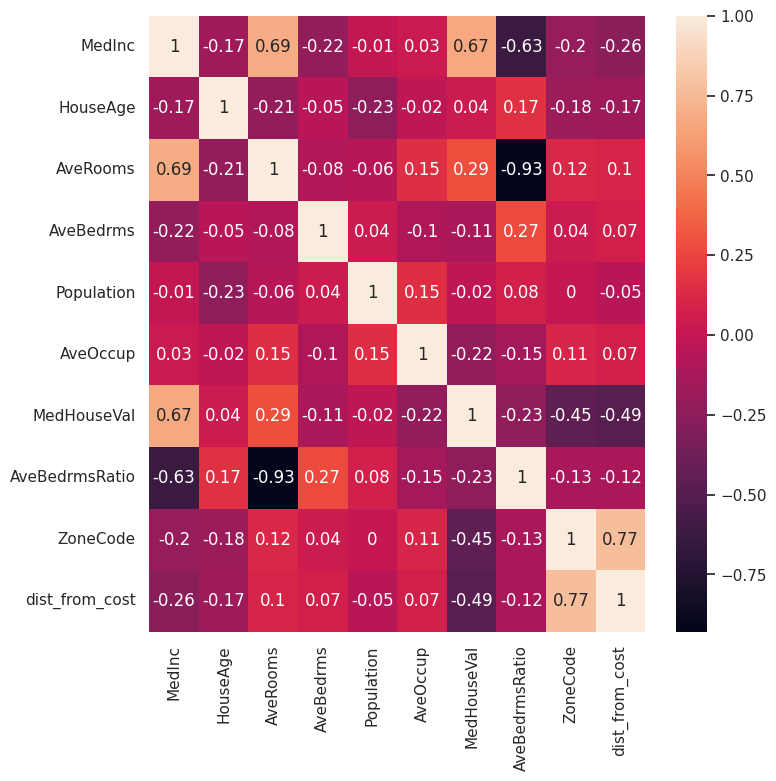

In [62]:
# Select the features
feat = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal', 'AveBedrmsRatio', 'ZoneCode', 'dist_from_cost']
# Calculate and plot
f, ax = plt.subplots(figsize=(8,8))
corr_matrix = df_train[feat].corr().round(2)
sns.heatmap(corr_matrix, annot = True);

# Feature Engineering
Using the obtained result, let's transform both test and train features

In [63]:
def get_location_cluster_code(df):
  kmeans = KMeans(n_clusters = 5, init ='k-means++')
  kmeans.fit(df[['Latitude', 'Longitude']]) # Compute k-means clustering.
  df['cluster_label'] = kmeans.fit_predict(df[['Latitude', 'Longitude']])
  return df

def _get_cost_line():
  # File with the coordinates of the California State cost line
  coords_df = pd.read_csv("https://raw.githubusercontent.com/vgruz/epic_data_science_course/main/coast_line_coords.csv")[['lon', 'lat']]
  # To be able to correctly define the distance between house and cost we need more points on the curve.
  # So I use the interpolation (cubic spline) to enlarge the number of points on the coast line.
  N = coords_df.shape[0]
  x = coords_df.iloc[:,1:].values.reshape(1, N)
  y = coords_df.iloc[:,0:1].values.reshape(1, N)
  xy = np.vstack((x, y))
  t = np.linspace(0, 1, N)
  spline = interp1d(t, xy, kind="cubic")

  t_fine = np.linspace(0, 1, 4 * N)
  x_fine, y_fine = spline(t_fine)
  return np.concatenate( [y_fine.reshape(y_fine.shape[0], 1), x_fine.reshape(x_fine.shape[0], 1)], axis = 1)

def _geodist(c1, c2):
  return Geodesic.WGS84.Inverse(c1[1], c1[0], c2[1], c2[0] )['s12']


def _get_dist_from_cost_line(lat, lon, coast):
  c = coast.get_nearest_neighbor([lon, lat])
  return c[0]


def simplify_house_age(df):
    if df.dtypes['HouseAge'] == 'float64':
      bins = (0, 26, 40, 60)
      group_names = ['New', 'Average Age', 'Old']
      numeric_groups = [0, 1, 2]
      categories = pd.cut(df['HouseAge'], bins, labels=group_names)
      numeric_categories = pd.cut(df['HouseAge'], bins, labels=numeric_groups)
      df['HouseAgeCategory'] = categories
      df['HouseAgeCategoryNum'] = numeric_categories
    return df



def add_avg_bedrms_ratio(df):
    df["AveBedrmsRatio"] = df["AveBedrms"] / df["AveRooms"]
    return df

def get_distance_from_the_ocean(df, lat='Latitude', lon="Longitude"):
    coast = vptree.VPTree(_get_cost_line(), _geodist)

    df['dist_from_cost'] = df.apply(lambda x: _get_dist_from_cost_line(x[lat], x[lon], coast),
                        axis=1)
    return df

def _replace_outliers(df, feature):
  col = df[feature]

  q1, q3 = col.quantile([0.25, 0.75])
  cond_low = (col[col < q1 - 1.5 * (q3 - q1)]).index
  con_high = (col[col > q3 + 1.5 * (q3 - q1)]).index
  return col.replace(col[cond_low].values, q1).replace(col[con_high].values, q3)


def replace_outliers(df):
  feat = ['AveRooms', 'AveBedrms',  'AveOccup', 'Population']
  for f in feat:
      df[f] = _replace_outliers(df, f)
  return df


def _get_zone_code(dist):
  if dist < 5000:
    return 0, 'Ocean'
  if dist < 45000:
    return 1, 'Near the Ocean'
  else:
    return 2, 'Inland'

def get_zone_code(df):
  df['ZoneCode'], df['ZoneDesc'] = zip(*df.apply(lambda x: _get_zone_code(x['dist_from_cost']), axis=1))
  return df


def drop_features(df):
    feat = ['MaxPrice']
    feat_drop = [c for c in feat if c in df.columns]
    if feat_drop:
      return df.drop(feat_drop, axis=1)
    return df

def transform_features(df):
    df = simplify_house_age(df)
    df = add_avg_bedrms_ratio(df)
    df = get_distance_from_the_ocean(df)
    df = get_zone_code(df)
    df = get_location_cluster_code(df)
    df = replace_outliers(df)
    df = drop_features(df)
    return df

df_train = transform_features(df_train)
df_test = transform_features(df_test)
df_train.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
id                                                                          
0   2.3859      15.0  3.827160   1.112100      1280.0  2.486989     34.60   
1   3.7188      17.0  6.013373   1.054217      1504.0  3.813084     38.69   
2   4.7750      27.0  6.535604   1.103175      1061.0  2.464602     34.71   
3   2.4138      16.0  3.350203   0.965432      1255.0  2.089286     32.66   
4   3.7500      52.0  4.284404   1.069246      1793.0  1.604790     37.80   

    Longitude  MedHouseVal  AveBedrmsRatio  MaxPrice  cluster_label  \
id                                                                    
0     -120.12        0.980        0.290581     False              2   
1     -121.22        0.946        0.175312     False              4   
2     -120.45        1.576        0.168795     False              2   
3     -117.09        1.336        0.288171     False              3   
4     -122.41        4.500        0.249567     False              0   

    dist_from_cost  ZoneCode        ZoneDesc  
id                                            
0     14426.664051         1  Near the Ocean  
1    150317.255838         2          Inland  
2     16244.125489         1  Near the Ocean  
3      6216.855085         1  Near the Ocean  
4      9616.561552         1  Near the Ocean

In [ ]:
df_train

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
id                                                                             
0      2.3859      15.0  3.827160   1.112100      1280.0  2.486989     34.60   
1      3.7188      17.0  6.013373   1.054217      1504.0  3.813084     38.69   
2      4.7750      27.0  6.535604   1.103175      1061.0  2.464602     34.71   
3      2.4138      16.0  3.350203   0.965432      1255.0  2.089286     32.66   
4      3.7500      52.0  4.284404   1.069246      1793.0  1.604790     37.80   
...       ...       ...       ...        ...         ...       ...       ...   
37132  3.3438      50.0  4.936508   1.079365      1775.0  3.022222     34.19   
37133  3.7308      26.0  5.087533   0.966019      1006.0  2.831243     37.32   
37134  4.1716      52.0  4.678862   1.101485      1156.0  1.431734     37.75   
37135  2.7143      16.0  5.710074   1.068376       584.0  2.803659     38.40   
37136  2.2419      34.0  5.424419   1.058685      1340.0  3.799065     36.34   

       Longitude  MedHouseVal  AveBedrmsRatio  cluster_label  ZoneCode  \
id                                                                       
0        -120.12        0.980        0.290581              3         1   
1        -121.22        0.946        0.175312              2         2   
2        -120.45        1.576        0.168795              3         1   
3        -117.09        1.336        0.288171              4         1   
4        -122.41        4.500        0.249567              0         1   
...          ...          ...             ...            ...       ...   
37132    -118.36        1.856        0.218650              1         1   
37133    -121.86        1.588        0.189880              0         2   
37134    -122.44        3.387        0.235417              0         1   
37135    -120.98        1.592        0.187104              2         2   
37136    -119.64        0.652        0.195170              3         2   

             ZoneDesc HouseAgeCategory HouseAgeCategoryNum  
id                                                          
0      Near the Ocean              New                   0  
1              Inland              New                   0  
2      Near the Ocean      Average Age                   1  
3      Near the Ocean              New                   0  
4      Near the Ocean              Old                   2  
...               ...              ...                 ...  
37132  Near the Ocean              Old                   2  
37133          Inland              New                   0  
37134  Near the Ocean              Old                   2  
37135          Inland              New                   0  
37136          Inland      Average Age                   1  

[37137 rows x 15 columns]

In [66]:
cols =  ['MedHouseVal', 'MedInc','AveRooms', 'dist_from_cost']

X = df_train[cols].drop('MedHouseVal', axis = 1)# Selecting independent variables by removing 'median_house_value' column from dataframe
X.head()

Y = df_train['MedHouseVal'] # Selecting dependent variable from the dataframe

def get_mutual_info_score(X, Y):
    mi = mutual_info_regression(X, Y, random_state=5)
    mi = pd.Series(mi, index=X.columns).sort_values(ascending=False)
    return mi
get_mutual_info_score(X, Y)
# The generated HouseAgeCategoryNum seems to be of no help.
# X.drop('HouseAgeCategoryNum', axis=1, inplace=True)

MedInc            0.405782
dist_from_cost    0.263370
AveRooms          0.111049
dtype: float64

In [67]:
SEED = 42

In [68]:
num_test = 0.50
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=num_test, random_state=SEED)

lr = LinearRegression() # Initializing the model
lr.fit(X_train, Y_train) # Fitting the model to the training data

Y_pred = lr.predict(X_test) # Predicting prices on the testing set
score = r2_score(Y_test, Y_pred) # Measuring Model performance by comparing the predicted values to the actual values

print(f'\nModel R² Score: {score:.3f}') # Printing R² score


Model R² Score: 0.562


In [69]:
rf = RandomForestRegressor(n_estimators=100) # Initializing the model
rf.fit(X_train, Y_train)

# make prediction of X_test
Y_pred = rf.predict(X_test)
score = r2_score(Y_test, Y_pred) # Measuring Model performance by comparing the predicted values to the actual values

print(f'\nModel R² Score: {score:.3f}') # Printing R² score


Model R² Score: 0.560


In [70]:
# RMSE
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
# MSE
mse = mean_squared_error(Y_test, Y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)

MSE:  0.42224131821065486
RMSE:  0.6498009835408491


In [ ]:
ids = df_test.index
cols = ['MedInc', 'HouseAge','AveRooms', 'AveOccup',  'AveBedrmsRatio', 'ZoneCode', 'Latitude', 'Longitude', 'cluster_label']
predictions = rf.predict(df_test[cols])


output = pd.DataFrame({ 'id' : ids, 'MedHouseVal': predictions})
output.to_csv('houseprices-predictions.csv', index = False)
output.head()

id  MedHouseVal
0  37137     0.687990
1  37138     1.064490
2  37139     3.837411
3  37140     3.449082
4  37141     2.584180